# Individual Planning Stage

https://github.com/YuanYuan-06/dsci-Individualplan.git

## Loading package

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Reading data

### reading "players" data

In [2]:
url_player = "http://drive.google.com/uc?export=download&id=1EHNNhxB-0P13COf3nGGV7hi2Y96ay5hq"
players <- read_csv(url_player)
head(players)
dim(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

### reading "sessions" data

In [3]:
url_sessions = "http://drive.google.com/uc?export=download&id=19U6P0gnqzlpL4NFfIgrG9riMbup52klE"
sessions <- read_csv(url_sessions)
head(sessions)
dim(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.72e+12,1.72e+12


[1] 1535    5

## Data exploration

### exploring"players" data

In [4]:
distinct_experience <- distinct(players,experience)
distinct_subscribe <- distinct(players,subscribe)
distinct_gender<- distinct(players,gender)

distinct_experience
distinct_subscribe
distinct_gender

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


In [5]:
player_max<- players |>
summarize(across(c(played_hours,Age),~round(max(.x, na.rm=TRUE),2)),statistic = "max")

player_min<- players |>
summarize(across(c(played_hours,Age),~round(min(.x, na.rm=TRUE),2)),statistic = "min")

player_mean<- players |>
summarize(across(c(played_hours,Age),~round(mean(.x, na.rm=TRUE),2)),statistic = "mean")

player_stats <- bind_rows(player_max,player_min,player_mean)

player_stats


played_hours,Age,statistic
<dbl>,<dbl>,<chr>
223.10,58.00,max
0.00,9.00,min
5.85,21.14,mean


In [6]:
experience_frequency <- players|>
count(experience)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

gender_frequency <- players|>
count(gender)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

subscribe_frequency <- players|>
count(subscribe)|>
mutate(percent = n/sum(n) *100)|>
arrange(desc(n))

experience_frequency
gender_frequency
subscribe_frequency

experience,n,percent
<chr>,<int>,<dbl>
Amateur,63,32.142857
Veteran,48,24.489796
Regular,36,18.367347
Beginner,35,17.857143
Pro,14,7.142857


gender,n,percent
<chr>,<int>,<dbl>
Male,124,63.2653061
Female,37,18.8775510
Non-binary,15,7.6530612
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245
Agender,2,1.0204082
Other,1,0.5102041


subscribe,n,percent
<lgl>,<int>,<dbl>
TRUE,144,73.46939
FALSE,52,26.53061


## Data description

### describing "players" data

#### 196 observations and 7 variables

The variables are:
1. `experience`(character): Player experience levels (`Pro`/ `Veteran`/ `Amateur`/ `Regular`/ `Beginner`). `Amateur` is the most frequent (32.14%), while `Pro` is the least (7.14%).

2. `subscribe`(logical): Subscription status (`TRUE`/ `FALSE`). 73.47% subscribed, 26.53% unsubscribed.

3. `hashedEmail`(character): Player's encrypted email address.

4. `played_hours`(double): Online gaming time (in hours), ranging from 0 to 223.1, with a mean of 5.85.

5. `name`(character): Player's name

6. `gender`(character): Player's gender (`Male`/ `Female`/ `Non-binary`/ `Prefer not to say`/ `Agender`/ `Two-Spirited`/ `Other`). `Male` is the most frequent (63.27%), while `Other` is the least (0.51%). 

7. `Age`(double): Player age (in years), ranging from 9 to 58, with a mean of 21.14. 

#### Issues visible in the data

In [7]:
players_missing <- players|>
summarize(across(experience:Age, ~sum(is.na(.x))))
players_missing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


1. `Age` has 2 missing values and can be filled with mean value. 
2. Categorical variables (`experience`/ `gender`/ `subscribe`) need numerical encoding for modeling. 
3. `played_hours` and `Age` may contain outliers. 

#### Potential issues not directly visible in the data

1. Self-reported `Age` may be inaccurate.
2. `played_hours` might be overestimated due to network or system issues. 

### describing "sessions" data

#### 1535 observations and 5 variables

The variables are:
1. `hashedEmail`(character): Player's encrypted email address.
2. `start_time`(character): Game session start time.
3. `end_time`(character): Game session end time.
4. `original_start_time`(double): Start timestamp (scientific notation). 
5. `original_end_time`(double): End timestamp (scientific notation).

#### Issues visible in the data

1. `original_start_time` and `original_end_time` are redundant columns and may cause confusion. 

#### Potential issues not directly visible in the data

1. Activity peaks may result from players' different time zones, so clarifying the data's base time zone is necessary. 

## Data visualization

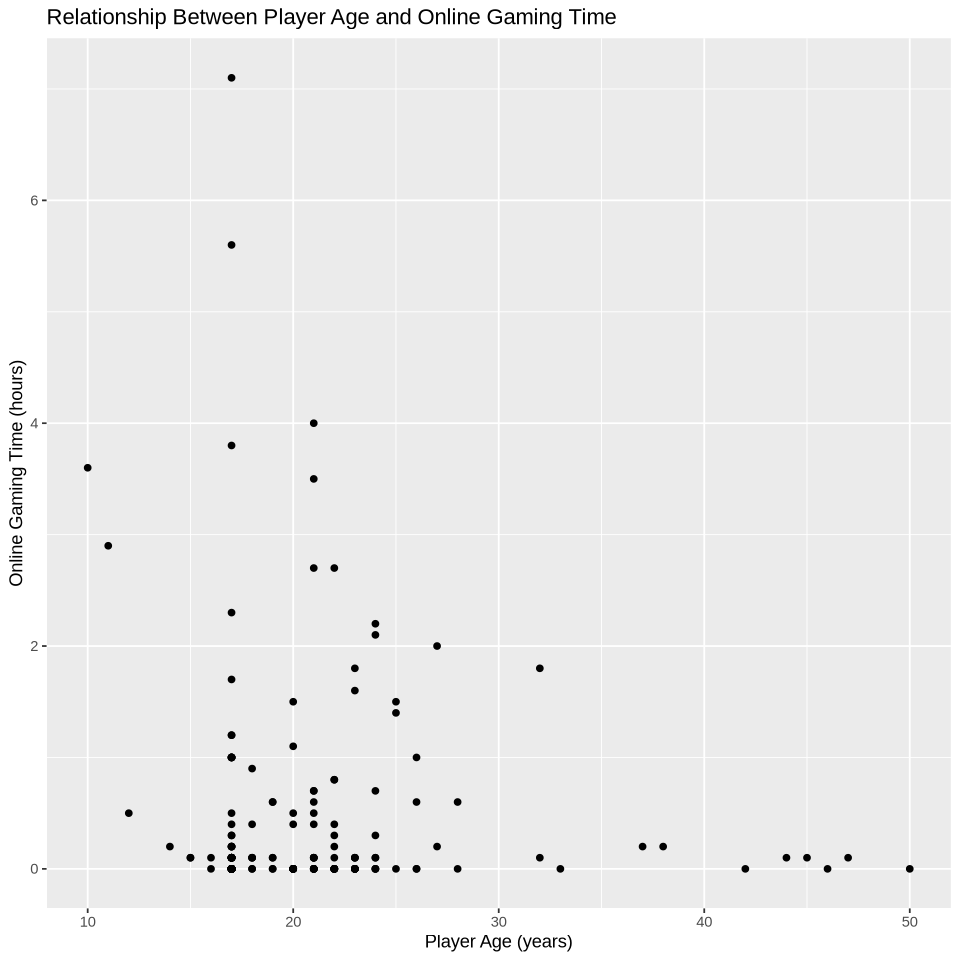

In [8]:
options(repr.plot.width=8, repr.plot.height =8)
players_age_playedhours <- players |>
filter(played_hours <= 10 & Age <= 50)|>
ggplot(aes(x=Age,y=played_hours))+
geom_point()+
labs(x="Player Age (years)", 
     y="Online Gaming Time (hours)", 
    title= "Relationship Between Player Age and Online Gaming Time")
players_age_playedhours

Younger players (aged 10-25) have longer gaming hours and are more likely to contribute data. 

In [9]:
players_experience_playedhours <- players|>
group_by(experience)|>
summarize(max=max(played_hours,na.rm=TRUE),
          min=min(played_hours,na.rm=TRUE),
          avg=mean(played_hours,na.rm=TRUE))|>
arrange(desc(avg))
players_experience_playedhours

experience,max,min,avg
<chr>,<dbl>,<dbl>,<dbl>
Regular,223.1,0,18.2083333
Amateur,150.0,0,6.0174603
Pro,30.3,0,2.6000000
Beginner,23.7,0,1.2485714
Veteran,12.5,0,0.6479167


Regular players have the highest average and maximum playtime. In contrast, Veteran players have the lowest.

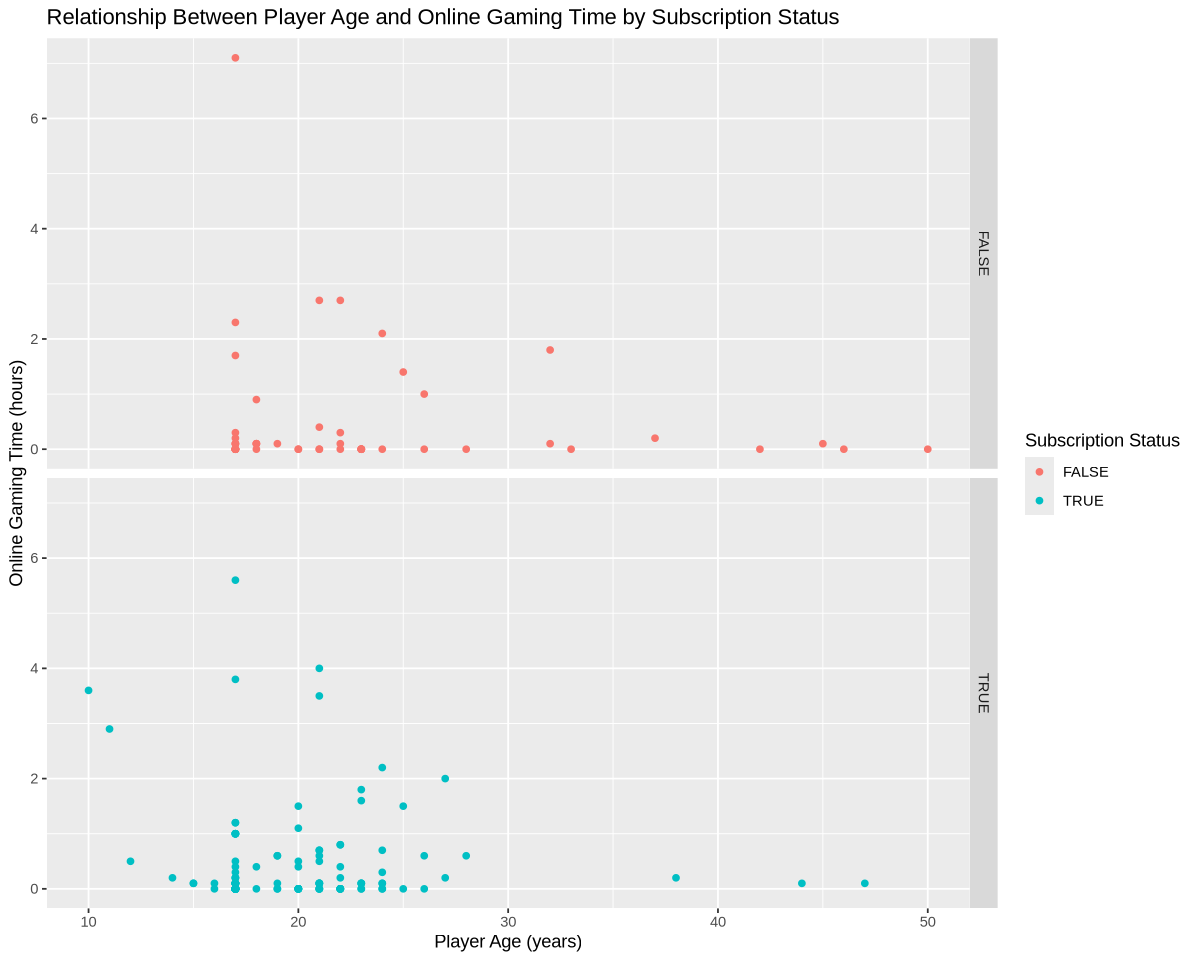

In [10]:
options(repr.plot.width=10, repr.plot.height = 8)
players_age_playedhours_subscribe <- players |>
filter(played_hours <= 10 & Age <= 50)|>
ggplot(aes(x=Age,y=played_hours))+
geom_point(aes(color=subscribe))+
labs(x="Player Age (years)", 
     y="Online Gaming Time (hours)", 
     color="Subscription Status",
    title= "Relationship Between Player Age and Online Gaming Time by Subscription Status")+
facet_grid(rows=vars(subscribe))

players_age_playedhours_subscribe

Younger players (aged 10-30) who subscribe to gaming information play longer.

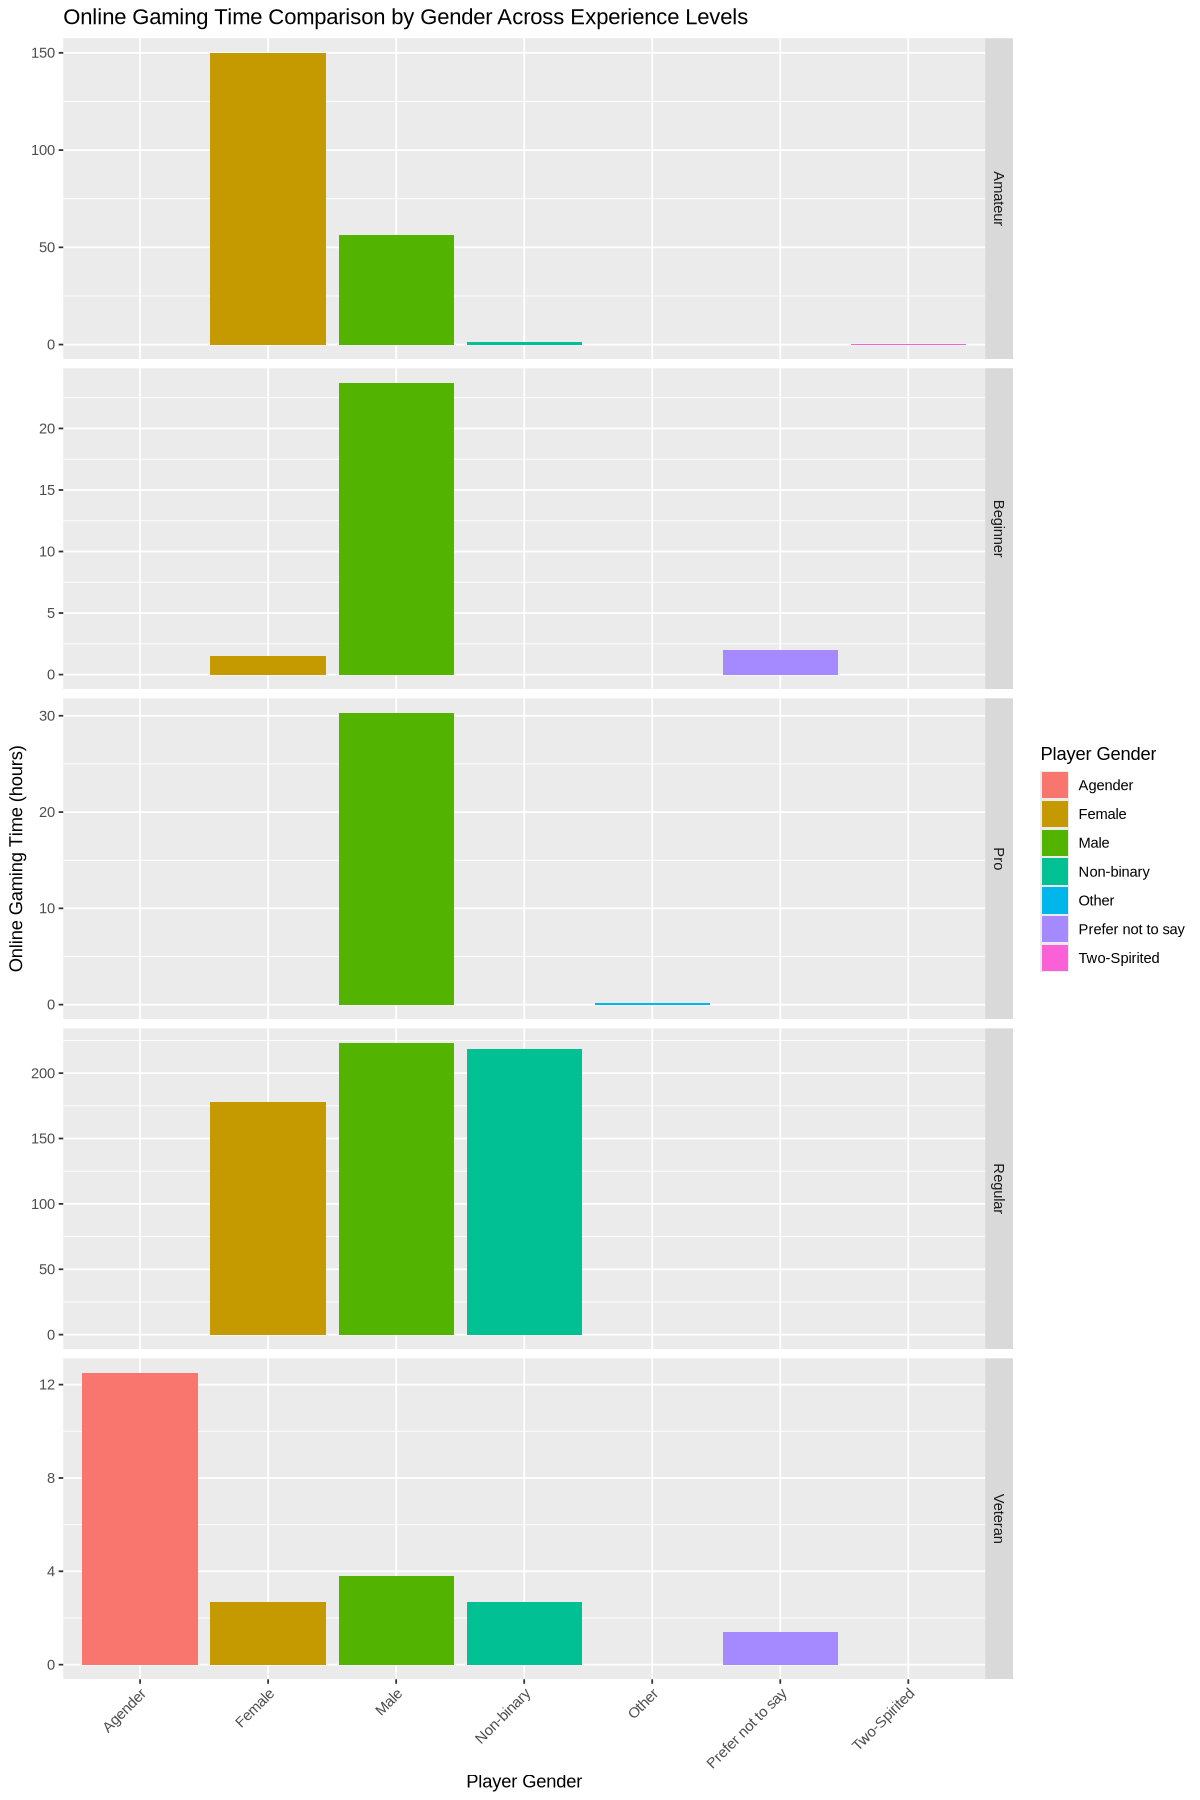

In [11]:
options(repr.plot.width=10, repr.plot.height = 15)
players_gender_playedtime_subscribe <- players |>
ggplot(aes(x=gender,y=played_hours, fill=gender))+
geom_col(position="dodge")+
labs(x="Player Gender", 
     y="Online Gaming Time (hours)",
     fill="Player Gender",
    title= "Online Gaming Time Comparison by Gender Across Experience Levels")+
facet_grid(rows=vars(experience),scales="free_y")+
theme(axis.text.x=element_text(angle=45, hjust=1))
players_gender_playedtime_subscribe

Among high-hour regular players, male is the most dominant group. 

## Selected Question and Dataset

**Broad question (Question 2)**: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific question**: Can `experience` and `Age` predict `played_hours` in `players.csv`?

`played_hours` directly reflects data contribution, so recruitment decisions can rely on its relationship with `experience` and `Age`. 

I selected `players.csv` as my dataset, as it contains all the variables used in prediction.

## Methods and Plan

Since `played_hours` is numerical, the problem can be classified as regression, so I will use **regression** as the predictive method. 

Weak linear relationships were observed between predictors and `played_hours`, so I will use **K-NN regression** to model non-linear relationships. 

K-NN regression assumes relationships exist between predictors and response variables. 

Because `experience` is categorical with an inherent order, I need to convert it into numerical values using **ordinal encoding**, assigning integer values (1-5) to `experience` levels based on its order.  

The method's weaknesses: slow performance with larger training data, poor performance with multiple predictors, and unable to predict values beyond training data.  

### Process used to compare and refine the model 

1. Split the data into a 75% training set and a 25% testing set.
2. Use 5-fold cross-validation on the training set to tune the best K that minimizes RMSE.
3. Retrain the model on the training set using the optimal K.
4. Evaluate the model's performance by using the testing set to calculate errors. 